In [92]:
import numpy as np
from PIL import Image
import seaborn as sns;
import matplotlib.pyplot as plt
import pandas as pd
import time

import sys
sys.path.append('../FINDER/Code/')
from Finder import Finder
from DbscanLoop import DbscanLoop
from dbscan_class import dbscan

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

ImportError: attempted relative import with no known parent package

In [9]:
minPts  = 5;
epsilon = 0.6;

ind_start = 100;

In [10]:
filename      = "../ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20";
#filename = "../MikeData/EGFR-P1-ATTO655_cell_3_MMImages.ome_locs_render"
#filename = "../MikeData/EGFR-P1-ATTO655_cell_2_MMImages.ome_locs_render_al_linked1sigma"

In [11]:
XC = np.loadtxt(filename+".txt");

In [31]:
XC = XC[:2000,:]

In [32]:
neigh = NearestNeighbors(n_neighbors=3);
neigh.fit(XC);

In [33]:
def CheckIfPointIsCore(ind):
    neigh_dist,neigh_ind = neigh.kneighbors(X=[XC[ind,:]],n_neighbors=minPts, return_distance=True);
    if(neigh_dist[0][-1] < epsilon):
        return True,neigh_ind[0][1:];

    else:
        return False,[];

In [86]:
def CheckIfPointIsCoreOfCores(ind,points_checked):
    
    # Input: 
    #  - index of point to check
    #  - list of indices of points checked that they are (simple) cores
    #
    # Output:
    #  - boolean indicating whether point is core of cores
    #  - list of points checked that are simple chores    
    
    points_to_check = [];
    
    #check for min requrirement
    is_core,neigh_ind = CheckIfPointIsCore(ind);
    
    if(not is_core):
        return False,[];

   # print(neigh_ind)
    points_to_check   += list(neigh_ind);
    points_checked    += [ind];

    if(False):
        print("Points checked:")
        print(points_checked)
        print("Points to check:")
        print(points_to_check)


    while(points_to_check != []):
        ind_ = points_to_check[-1];
        points_to_check = points_to_check[:-1];
        is_core,neigh_ind = CheckIfPointIsCore(ind_);
        
        if(is_core):
            points_checked += [ind_];
        else:
            return False,points_checked;
        
        neigh_ind_clean = [x for x in neigh_ind if x not in points_checked];
        points_to_check += list(neigh_ind_clean);
#        points_to_check = [x for x in points_to_check if x not in points_checked];
        
        points_to_check = list(np.unique(points_to_check))
        
        if(False):
            print("Points checked:")
            print(points_checked)        
            print("Points to check:")
            print(points_to_check)

    
    return True,points_checked

In [91]:
t_1 = time.time()
points_checked_all = [];
is_core_all = np.zeros((len(XC),),dtype=bool)
for ind in np.arange(len(XC)):
    is_core_,points_checked_all = CheckIfPointIsCoreOfCores(ind,points_checked_all);
    is_core_all[ind] = is_core_;
    
print("computation time: "+str(time.time()-t_1));

computation time: 7.838449239730835


In [89]:
DB = DbscanLoop(eps=epsilon,min_samples=minPts).fit(XC);
labels = DB.labels_;
is_core_DB = (labels>-1)

In [90]:
print(np.sum(is_core_DB))
print(np.sum(is_core_all))

1464
1419


True


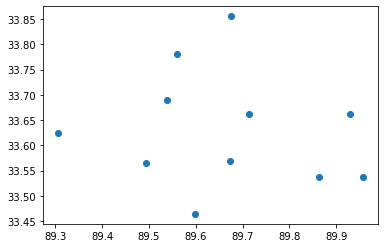

In [72]:
is_core,points_checked = CheckIfPointIsCoreOfCores(2,[]);
print(is_core)
plt.scatter(XC[points_checked,0],XC[points_checked,1])

In [69]:
if(neigh_dist[0][-1] < epsilon):
    #Initial Cluster detected
    indices_to_process = list(neigh_ind[0]);
    cluster_indices += new_indices
    
    c = 0;
    while ((indices_to_process != []) and (c<4)):
        #Go through all additional points: 
        ind         = new_indices[-1];
        new_indices = new_indices[:-1];         
        neigh_dist,neigh_ind = neigh.kneighbors(X=[XC_test[ind,:]],n_neighbors=minPts, return_distance=True);
        if(neigh_dist[0][-1] < epsilon):
            #Add other, 
            new_indices         = list(neigh_ind[0][1:]);
            indices_to_process += new_indices
            cluster_indices    +=
        
        indices_to_process = np.unique(indices_to_process)
        
        print()
        c = c + 1;


[  7  37 100 155]
[  7  37 100 155 919]
[  7  37 100 155]
[  7  37 100 155 919]


In [55]:
list(neigh_ind[0])

[100, 155, 37, 7, 919]

In [60]:
[item for item in cluster_indices if item not in [7]]

[100, 155, 37, 919]